# Peer-to-Peer Mobile Lending in a Digital Finance App

A fintech company runs a mobile app that lets users send money to friends, borrow small amounts, and repay loans without traditional banks. You're analyzing user interactions over 3 months to understand how influence and trust spread in the network.

## You have the following simplified interaction types:

We are goint to work in a **directed network**, with arc (**$\to$**) showing the direction, for intance:

$A$ $\to$ $B$: $A$ sent money to $B$

$B$ $\to$ $A$: $B$ repaid a loan from $A$

$C$ $\to$ $A$: $C$ borrowed from $A$

From these interactions, you will create a directed graph where nodes are users and edges represent money flow. You’ll use this graph to compute key SNA metrics.

# Social Network Analysis 

Social Network Analysis studies relationships and interactions among entities (called nodes) through the connections (edges) that link them. Moreover, the metrics used to perform this analysis in graphs transform structure into meaning. They help identify the roles of entities in the network, as well as risks, opportunities, and strategies within complex social or such, in this case, financial systems. 

The metrics help to answer questions such:
 - Who are the most trusted users who receive money frequently?
 - If a key user is removed, which other users would lose connectivity?
 - Who could spread a new feature or incentive fastest (e.g., referral program)?




 

In [8]:
# Import libraries

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Create a Directed Graph
G= nx.DiGraph() # this line creates a directed graph

# Create the nodes of the Network
# Showing interactions between different nodes (users)

edges = [
    ("Alice", "Bob"),    # Alice sent money to Bob
    ("Alice", "Charlie"),# Alice sent money to Charlie
    ("Bob", "Alice"),    # Bob repaid Alice
    ("Charlie", "Alice"),# Charlie borrowed from Alice
    ("Alice", "Dana"),   # Alice sent money to Dana
    ("Eve", "Bob"),      # Eve sent money to Bob
    ("Bob", "Charlie"),  # Bob sent money to Charlie
    ("Charlie", "Eve"),  # Charlie sent money to Eve
    ("Dana", "Eve"),     # Dana sent money to Eve
    ("Eve", "Alice")     # Eve repaid Alice
]

# Add the edges to the graph
G.add_edges_from(edges)

## Visualization of the Directed Network
The following code creates a directed graph representing money transactions between users.

 **The nodes represent users, and the directed edges represent transactions.**


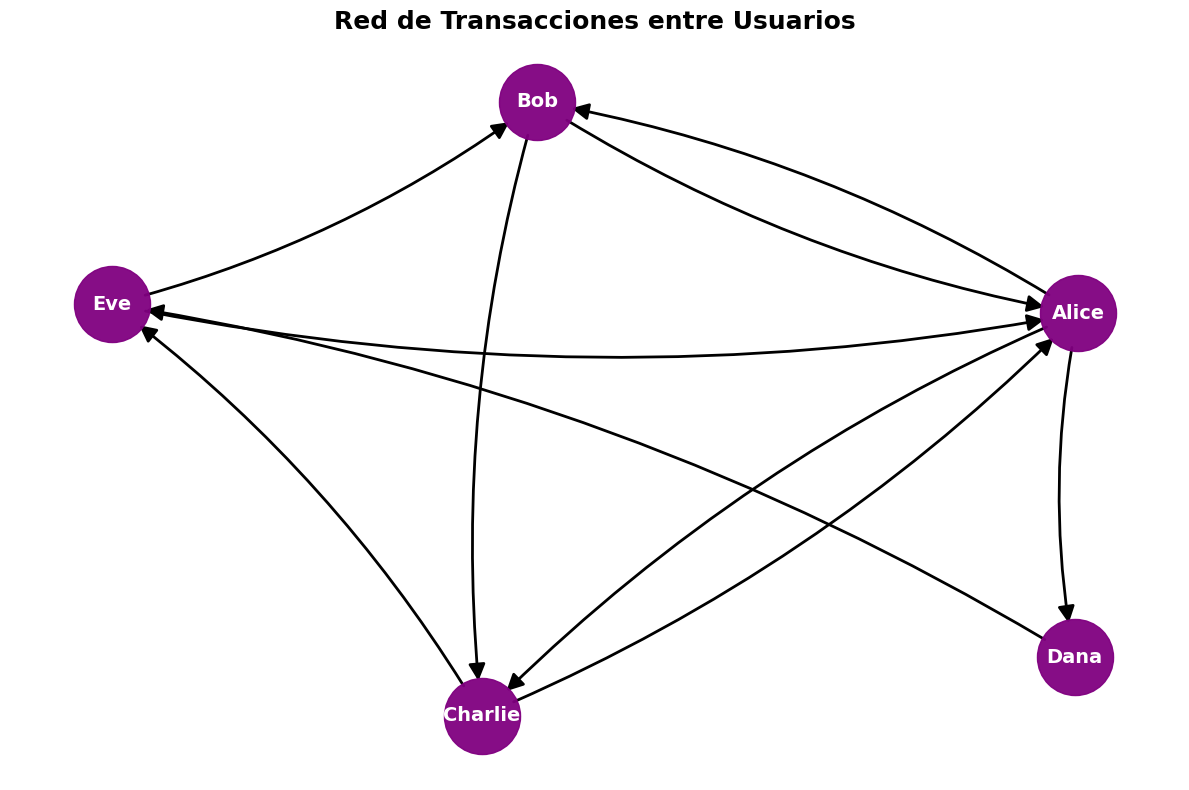

In [10]:
plt.figure(figsize=(12, 8))

# Draw edges with margins so arrows stop at node borders
nx.draw_networkx_edges(
    G,
    pos=pos,
    arrowstyle='-|>',
    arrowsize=25,
    edge_color='black',
    width=2,
    connectionstyle='arc3,rad=0.1',
    min_source_margin=25,
    min_target_margin=25
)

# Draw nodes
nx.draw_networkx_nodes(
    G, pos=pos, node_color="purple", node_size=3000, alpha=0.95
)
nx.draw_networkx_labels(
    G, pos=pos, font_size=14, font_color='white', font_weight='bold'
)

plt.title("Red de Transacciones entre Usuarios", fontsize=18, fontweight='bold', color='black')
plt.axis('off')
plt.tight_layout()
plt.show()


## Metrics

# Degree Centrality

This metric use number of connections a node has (in and out separately for directed networks) to identify active participants (many transactions) or highly requested users.

The Degree Centrality metric provides information that allows us to answer these questions:
 
Q1: Who is the most active user sending money (high out-degree)?
 
Q2: Who is the most trusted user receiving money frequently (high in-degree)?


**NOTE:**

**- High out-degree = lender or sender** 

**- high in-degree = popular receiver or target of transactions.**

In [12]:
# Degree Centrality
in_deg = dict(G.in_degree())
out_deg = dict(G.out_degree())

# Highest in-degree
max_in_deg_user = max(in_deg, key=in_deg.get)
max_in_deg_value = in_deg[max_in_deg_user]

# Highest out-degree
max_out_deg_user = max(out_deg, key=out_deg.get)
max_out_deg_value = out_deg[max_out_deg_user]

print(f"The most active user sending money: {max_in_deg_user} ({max_in_deg_value})")
print(f"The most trusted user receiving money frequently: {max_out_deg_user} ({max_out_deg_value})")

The most active user sending money: Alice (3)
The most trusted user receiving money frequently: Alice (3)


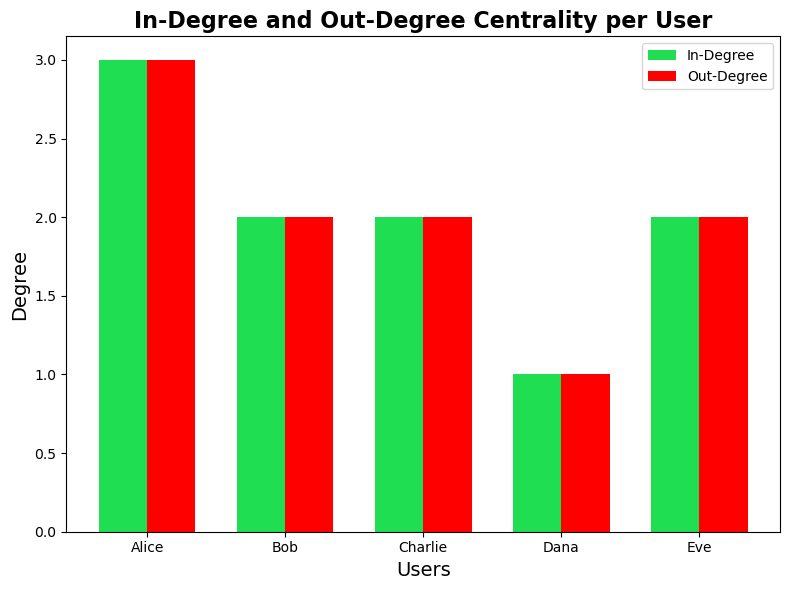

In [49]:
# Plot in-degree and out-degree centrality for each user

users = list(G.nodes())
in_values = [in_deg[user] for user in users]
out_values = [out_deg[user] for user in users]

x = np.arange(len(users))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, in_values, width, label='In-Degree', color='#1fde52') 
plt.bar(x + width/2, out_values, width, label='Out-Degree', color='red')
plt.xticks(x, users)
plt.ylabel('Degree', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.title('In-Degree and Out-Degree Centrality per User', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

# Betweenness Centrality

The betweenness centrality measures how often a node lies on the shortest paths between other nodes. Let's picture this with the analogy of a major airport hub—many routes go through it because that way, the route is shorter.

This metric allows us to address this question:

Q3: Who is the user that act as bridges within the community (e.g., lenders)?


**Note:** 

**High betweenness = A high betweenness for an agent, in the context of financial transactions, indicates that is financial gatekeeper with significant influence, as it connects many users and can either delay, facilitate, or block interactions.**




In [14]:
# Betweenness Centrality
bet_cen = nx.betweenness_centrality(G)

# Highest betweenness centrality
max_bet_user = max(bet_cen, key=bet_cen.get)
max_bet_value = bet_cen[max_bet_user]

print(f"The user that act as bridge within the network is {max_bet_user} ({max_bet_value:.4f})")


The user that act as bridge within the network is Alice (0.3750)


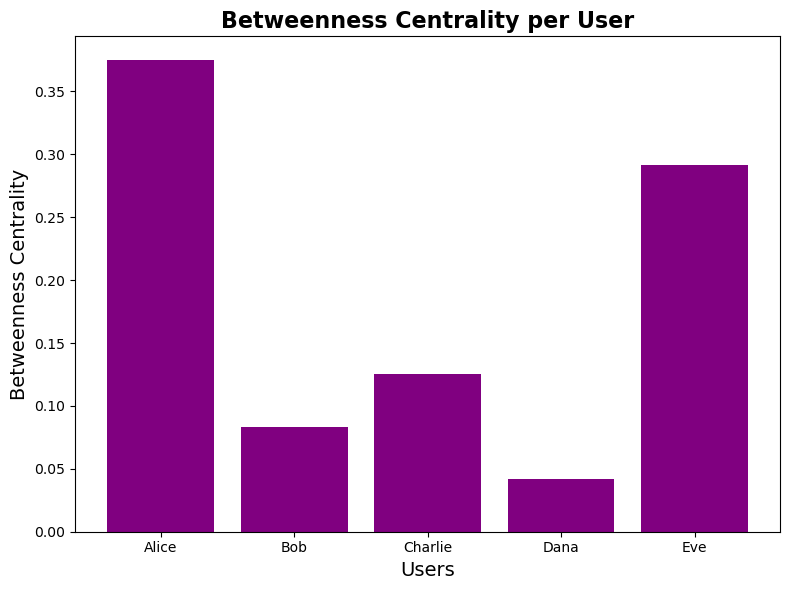

In [41]:
# Betweenness centrality of each user in the network
bet_values = [bet_cen[user] for user in users]
plt.figure(figsize=(8, 6))
plt.bar(users, bet_values, color='purple')
plt.ylabel('Betweenness Centrality',fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.title('Betweenness Centrality per User',fontsize=16, fontweight='bold')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Closeness Centrality

It measures how close, on average, a node is to all other nodes in the network based on the shortest paths. You can catch this as a person in a city center who can reach everyone faster than someone in a remote village because, on average, that person is closest to the others.  

This metric help us to answer the question:

Q4: Who is the user in “central” positions who could be promoted to become an agent?

**Note:**
**High closeness = short average distance to every node in the network**



In [50]:
# Compute closeness centrality
clo_cen = nx.closeness_centrality(G)

# User with highest closeness centrality
max_clo_user = max(clo_cen, key=clo_cen.get)
max_clo_value = clo_cen[max_clo_user]

print(f"The user that could be promoted to become a agent is: {max_clo_user} ({max_clo_value:.4f})")

The user that could be promoted to become a agent is: Alice (0.8000)


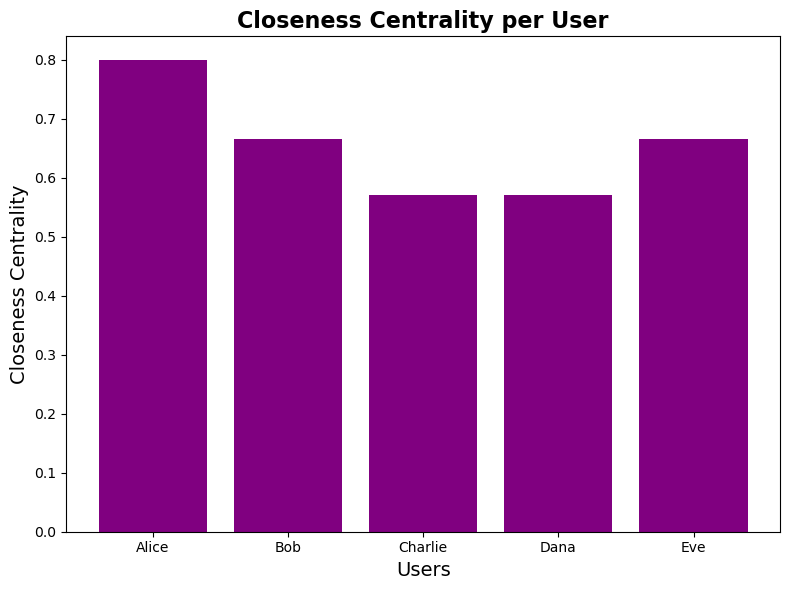

In [44]:
#closeness centrality of each user in the network
clo_values = [clo_cen[user] for user in users]
plt.figure(figsize=(8, 6))
plt.bar(users, clo_values, color='purple')
plt.ylabel('Closeness Centrality', fontsize=14) 
plt.xlabel('Users', fontsize=14)
plt.title('Closeness Centrality per User', fontsize=16, fontweight='bold')         
plt.tight_layout()
plt.show()

Also, the average distance of a particular node to any other node can be found easily with the formula:
$$  \frac{1}{Closeness\: centrality \:(Node)}$$ 

In other words, refers to the average number of connections (or steps) needed to travel from one node to another within a network.

This variation fo the metric help us to answer the question:

Q5: How far is, in terms of average connections, the “central” individual from others within the network?




In [51]:
avg_dist=1/ clo_cen[max_clo_user]

print(f"The average distance for {max_clo_user} to reach  all users is: {round(avg_dist,2)} connections")

The average distance for Alice to reach  all users is: 1.25 connections


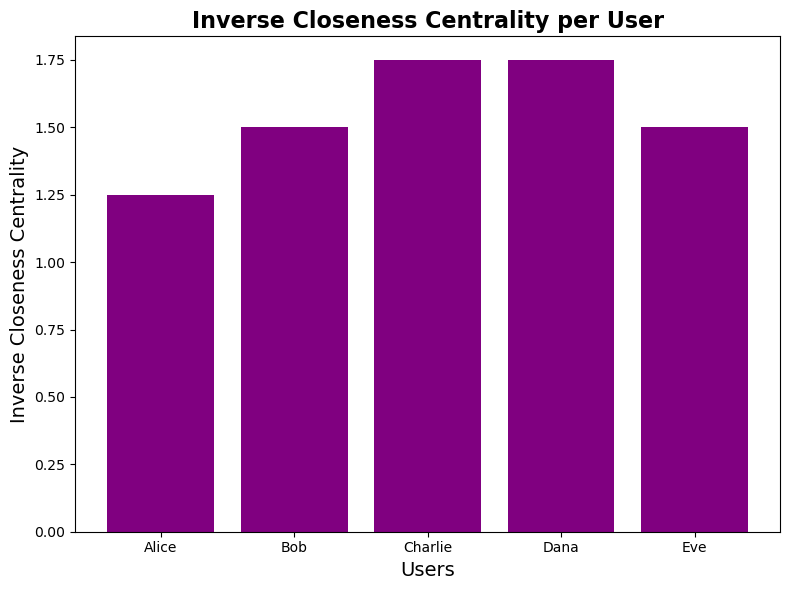

In [46]:
# The average distance for the users to reach all users in the network
# is the inverse of the closeness centrality value for that user.

inverse_clo_cen = {user: 1 / value if value > 0 else 0 for user, value in clo_cen.items()}

inverse_clo_cen_values = [inverse_clo_cen[user] for user in users]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(users, inverse_clo_cen_values, color='purple')
plt.ylabel('Inverse Closeness Centrality', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.title('Inverse Closeness Centrality per User', fontsize=16, fontweight='bold')         
plt.tight_layout()
plt.show()
